## Neural Network
tensorfolow

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
# -----------------------------
# PARAMETERS
HORIZON = 48        # Forecast horizon in hours
test_years = 2      # Hold-out years for testing
alpha = 0.001       # L2 regularization strength
batch_size = 64     # Mini-batch size
epochs = 100        # Max training epochs
patience = 10       # EarlyStopping patience
# -----------------------------

In [22]:

# 1. LOAD & PREPARE DATA
df = pd.read_csv('data/renewables/pv_data.csv', comment='#', parse_dates=['time'])
df.rename(columns={'time':'timestamp','electricity':'pv_power'}, inplace=True)
df.set_index('timestamp', inplace=True)
daily = df['pv_power'].asfreq('H')

/var/folders/1m/qt1qgmf14_gb0hy_4g7323hc0000gn/T/ipykernel_93939/3119195792.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily = df['pv_power'].asfreq('H')


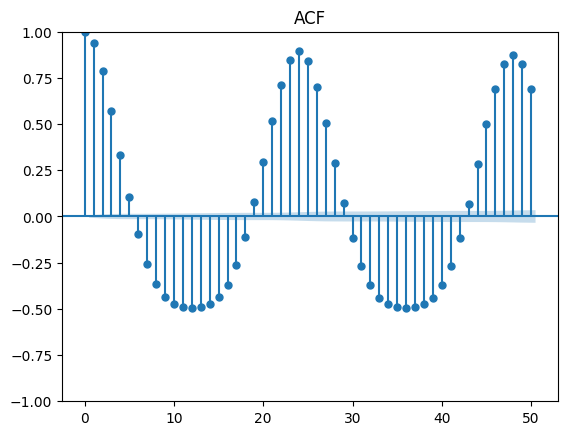

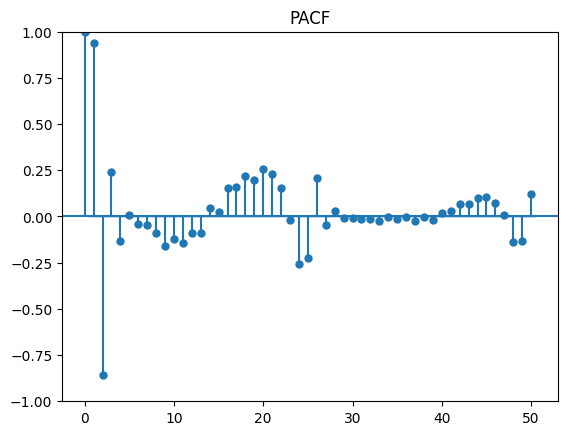

Using lags: [1, 2, 3, 18, 20, 21, 24, 25, 26]


In [23]:
# 2. ACF/PACF to select lags
plot_acf(daily.dropna(), lags=50, title='ACF')
plt.show()
plot_pacf(daily.dropna(), lags=50, method='ywm', title='PACF')
plt.show()
# Based on PACF > 0.2
from statsmodels.tsa.stattools import pacf
pacf_vals = pacf(daily.dropna(), nlags=50, method='ywm')
lags = [i for i, v in enumerate(pacf_vals) if i>0 and abs(v)>0.2]
if not lags:
    lags = list(range(1,25))
print(f"Using lags: {lags}")

In [25]:
# 3. CREATE FEATURES
def create_features(series, lags):
    df_feat = pd.DataFrame(index=series.index)
    for lag in lags:
        df_feat[f'lag_{lag}'] = series.shift(lag)
    df_feat['hour'] = series.index.hour
    df_feat['dayofyear'] = series.index.dayofyear
    df_feat['month'] = series.index.month
    df_feat['target'] = series.values
    return df_feat.dropna()

feats = create_features(daily, lags)

In [27]:
# 4. TRAIN/TEST SPLIT
def split_by_years(feats, years):
    split_date = feats.index.max() - pd.DateOffset(years=years)
    return feats[:split_date], feats[split_date:]

train, test = split_by_years(feats, test_years)
X_train, y_train = train.drop('target', axis=1).values, train['target'].values
X_test, y_test   = test.drop('target', axis=1).values, test['target'].values
# 5. SCALE
dt_X = StandardScaler(); dt_y = StandardScaler()
X_train_s = dt_X.fit_transform(X_train)
X_test_s  = dt_X.transform(X_test)
y_train_s = dt_y.fit_transform(y_train.reshape(-1,1))

In [30]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 7. EVALUATE
y_pred_s = model.predict(X_test_s).flatten()
y_pred   = dt_y.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))
mae      = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f} kW | Test RMSE: {rmse:.3f} kW")

NameError: name 'model' is not defined

In [ ]:
# 8. VISUALIZE
def plot_results(idx, actual, pred, hours=168):
    plt.figure(figsize=(12,5))
    plt.plot(idx[:hours], actual[:hours], label='Actual')
    plt.plot(idx[:hours], pred[:hours], label='Predicted')
    plt.xlabel('Time'); plt.ylabel('PV Power (kW)')
    plt.legend(); plt.show()

plot_results(test.index, y_test, y_pred)

In [ ]:
# 8. VISUALIZE
plt.figure(figsize=(12,5))
plot_len = min(len(y_test), 7*24)
plt.plot(test.index[:plot_len], y_test[:plot_len], label='Actual')
plt.plot(test.index[:plot_len], y_pred[:plot_len], label='Predicted')
plt.xlabel('Time'); plt.ylabel('PV Power (kW)')
plt.title('Actual vs Predicted (First Week of Test)')
plt.legend(); plt.show()

In [ ]:

# 9. CROSS-CORRELATION (no exogenous series available)
# ccf requires two series; here we skip as we have only PV power.
# If you have a second time series (e.g., temperature), compute ccf(pv, temp)

# 10. ITERATIVE FORECAST

def iterative_forecast(model, data, scaler_X, scaler_y, lags, horizon):
    history = list(data.iloc[-max(lags):])
    base_time = data.index.max()
    preds = []
    for h in range(1, horizon+1):
        feat = [history[-lag] for lag in lags]
        next_time = base_time + pd.Timedelta(hours=h)
        feat.extend([next_time.hour, next_time.dayofyear, next_time.month])
        X_in = scaler_X.transform(np.array(feat).reshape(1,-1))
        y_s = model.predict(X_in)
        y = scaler_y.inverse_transform(y_s.reshape(-1,1)).item()
        preds.append(y); history.append(y)
    return np.array(preds)

forecast = iterative_forecast(model, daily, scaler_X, scaler_y, lags, HORIZON)
print(f"Next {HORIZON}h forecast: {np.round(forecast,3)}")